##Name: Aditya D. Giradkar
##Class: TY_CS_B
##Gr. No.: 11810629
##ROll No: 10
##Assignment: KMeans Algorithm

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [ ]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
X = df.iloc[:, [3, 4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

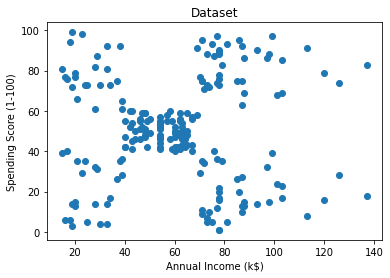

In [ ]:
plt.plot() 
x1 = df.iloc[:, 3].values
x2 = df.iloc[:, 4].values
plt.title('Dataset') 
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.scatter(x1, x2) 
plt.show()

###KMeans Algorithm from scratch

In [ ]:
# calculating 5 random centroid
def calculate_random_centroid(K):
  centroid = []
  for i in range(K):
    centroid.append(random.choice(X))
  return centroid

In [ ]:
def kmeans_algo(x,k, no_of_iterations):
    #Randomly choosing Centroids 
    centroids = calculate_random_centroid(5)
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean')
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances])
     
    #Repeating the above steps for a defined number of iterations
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points

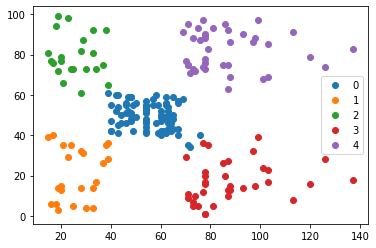

In [ ]:
label = kmeans_algo(X,5,1000)
 
#Visualize the results 
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

###KMeans Algorithm using Sklearn

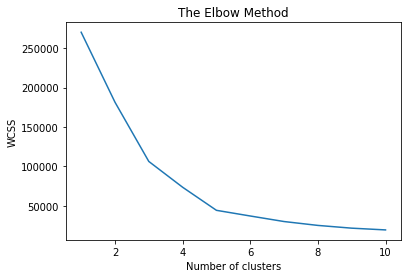

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans



wcss = []
for i in range(1, 11):

  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  
  kmeans.fit(X)
  
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)

plt.title('The Elbow Method')

plt.xlabel('Number of clusters')

plt.ylabel('WCSS')

plt.show()

In [ ]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

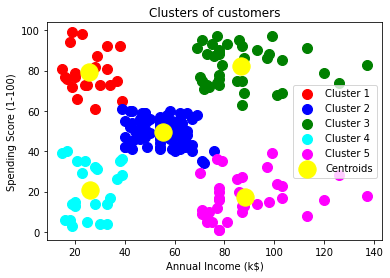

In [ ]:
# Visualising the clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

##Hierarchical Clustering

In [ ]:
# Importing the dataset

dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

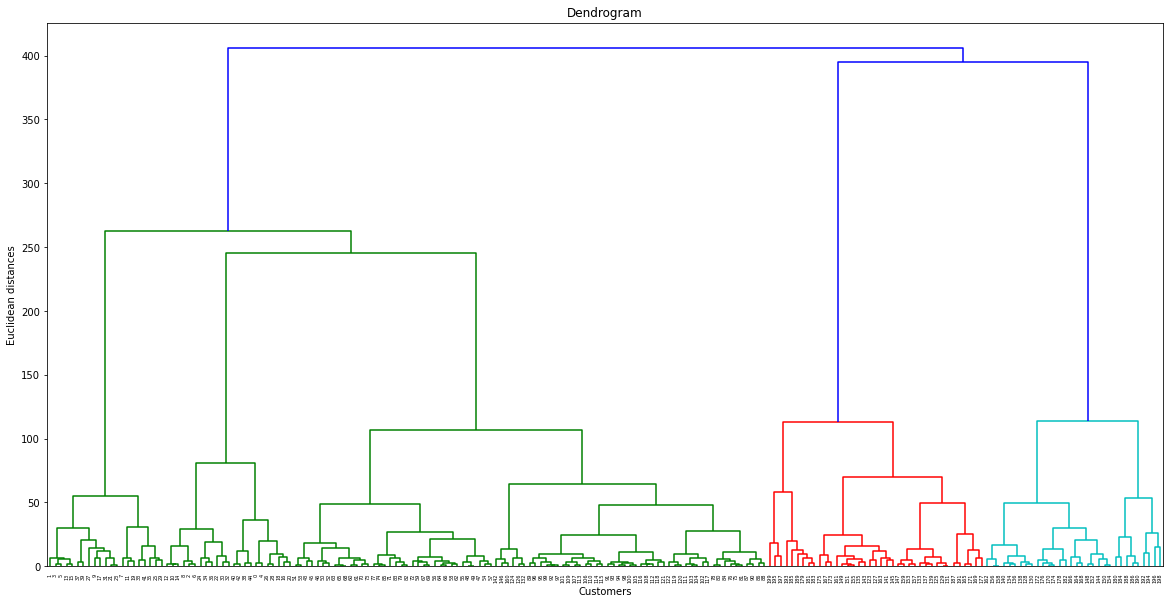

In [ ]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# Training the Hierarchical Clustering model on the dataset

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

y_hc = hc.fit_predict(X)

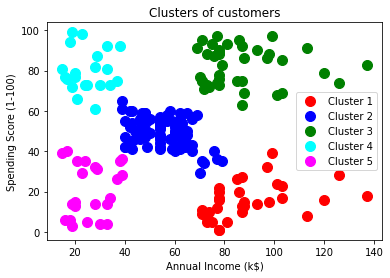

In [ ]:
# Visualising the clusters

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.title('Clusters of customers')

plt.xlabel('Annual Income (k$)')

plt.ylabel('Spending Score (1-100)')

plt.legend()

plt.show()